In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
NOAA_20_file = "data/NOAA_20_{year}.csv"
SNPP_file = "data/SNPP_{year}.csv"
NOAA_20_data = []
SNPP_data = []

for year in [2019, 2021, 2022, 2023, 2024]:
    NOAA_20_file = NOAA_20_file.format(year=year)
    SNPP_file = SNPP_file.format(year=year)
    # Read the NOAA-20 data and the SNPP data
    firms_data_NOAA_20 = pd.read_csv(NOAA_20_file)
    firms_data_SNPP = pd.read_csv(SNPP_file)
    # Append the data to the list
    NOAA_20_data.append(firms_data_NOAA_20)
    SNPP_data.append(firms_data_SNPP)

NOAA_20_data = pd.concat(NOAA_20_data, ignore_index=True)
SNPP_data = pd.concat(SNPP_data, ignore_index=True)

In [3]:
NOAA_20_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,47.79976,-53.99381,304.80,0.38,0.36,2019-01-01,539,N20,VIIRS,n,2,263.57,1.38,N,2
1,46.52091,-84.39311,328.11,0.46,0.39,2019-01-01,721,N20,VIIRS,n,2,261.14,4.65,N,0
2,58.57620,-122.58728,312.38,0.39,0.36,2019-01-01,1040,N20,VIIRS,n,2,265.10,1.14,N,0
3,57.02739,-122.92043,327.14,0.40,0.37,2019-01-01,1040,N20,VIIRS,n,2,271.05,5.77,N,0
4,55.45625,-116.73504,295.05,0.40,0.44,2019-01-01,1040,N20,VIIRS,n,2,266.42,0.93,N,0


In [4]:
SNPP_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,50.52198,-104.63961,340.97,0.35,0.56,2019-01-01,811,N,VIIRS,n,2,249.99,3.40,N,2
1,58.02918,-116.75737,322.70,0.43,0.38,2019-01-01,950,N,VIIRS,n,2,266.24,1.36,N,0
2,55.05537,-118.55580,335.59,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,272.81,5.44,N,0
3,55.05296,-118.53534,313.18,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,271.66,1.54,N,0
4,55.05107,-118.55022,318.29,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,272.62,2.34,N,0


In [5]:
print("NOAA 20 Data:")
NOAA_20_data.info()

NOAA 20 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967510 entries, 0 to 967509
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    967510 non-null  float64
 1   longitude   967510 non-null  float64
 2   brightness  967510 non-null  float64
 3   scan        967510 non-null  float64
 4   track       967510 non-null  float64
 5   acq_date    967510 non-null  object 
 6   acq_time    967510 non-null  int64  
 7   satellite   967510 non-null  object 
 8   instrument  967510 non-null  object 
 9   confidence  967510 non-null  object 
 10  version     967510 non-null  int64  
 11  bright_t31  967510 non-null  float64
 12  frp         967510 non-null  float64
 13  daynight    967510 non-null  object 
 14  type        967510 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 110.7+ MB


In [6]:
print("SNPP Data:")
SNPP_data.info()

SNPP Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943460 entries, 0 to 943459
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    943460 non-null  float64
 1   longitude   943460 non-null  float64
 2   brightness  943460 non-null  float64
 3   scan        943460 non-null  float64
 4   track       943460 non-null  float64
 5   acq_date    943460 non-null  object 
 6   acq_time    943460 non-null  int64  
 7   satellite   943460 non-null  object 
 8   instrument  943460 non-null  object 
 9   confidence  943460 non-null  object 
 10  version     943460 non-null  int64  
 11  bright_t31  943460 non-null  float64
 12  frp         943460 non-null  float64
 13  daynight    943460 non-null  object 
 14  type        943460 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 108.0+ MB


In [7]:
print(NOAA_20_data.isnull().sum())
print(SNPP_data.isnull().sum())

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64


In [8]:
NOAA_20_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type
count,967510.000000,967510.000000,967510.000000,967510.000000,967510.000000,967510.000000,967510.0,967510.000000,967510.000000,967510.000000
mean,57.141328,-114.965459,326.553966,0.457475,0.476869,1388.069271,2.0,287.787406,14.337097,0.112712
std,5.052784,15.177598,20.988758,0.088857,0.114389,538.517183,0.0,12.734319,38.609147,0.517034
min,42.037600,-141.003540,207.930000,0.320000,0.360000,436.000000,2.0,226.510000,0.000000,0.000000
25%,53.415030,-121.793090,307.120000,0.390000,0.380000,925.000000,2.0,280.540000,1.880000,0.000000
50%,58.137360,-116.961830,328.000000,0.440000,0.440000,1058.000000,2.0,286.395000,4.130000,0.000000
75%,59.703740,-109.681240,342.760000,0.500000,0.560000,2000.000000,2.0,294.410000,10.870000,0.000000
max,81.218830,-52.783790,367.000000,0.800000,0.780000,2338.000000,2.0,378.330000,1607.100000,3.000000


In [9]:
SNPP_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type
count,943460.000000,943460.000000,943460.000000,943460.000000,943460.000000,943460.000000,943460.0,943460.000000,943460.000000,943460.000000
mean,56.992639,-114.554546,327.444347,0.459787,0.470580,1415.281300,2.0,288.054418,14.971194,0.117610
std,4.989113,15.101389,21.444185,0.087083,0.113357,542.607186,0.0,12.708133,38.407918,0.527215
min,41.802550,-141.001920,208.000000,0.320000,0.360000,423.000000,2.0,218.730000,0.000000,0.000000
25%,53.264143,-120.446410,307.540000,0.390000,0.370000,943.000000,2.0,280.760000,1.870000,0.000000
50%,58.126420,-116.812315,329.120000,0.440000,0.430000,1105.000000,2.0,286.700000,4.310000,0.000000
75%,59.630410,-108.282672,343.940000,0.510000,0.540000,2007.000000,2.0,294.680000,11.680000,0.000000
max,82.231880,-53.242820,367.000000,0.800000,0.780000,2338.000000,2.0,384.830000,1625.280000,3.000000


In [10]:
## Filtering out points with low confidence
rows = (NOAA_20_data.shape[0], SNPP_data.shape[0])

#Cleaning the data
NOAA_20_data = NOAA_20_data[NOAA_20_data['confidence'].isin(['n', 'h'])]
SNPP_data = SNPP_data[SNPP_data['confidence'].isin(['n', 'h'])]
NOAA_20_data = NOAA_20_data[NOAA_20_data['frp'] != 0]
SNPP_data = SNPP_data[SNPP_data['frp'] != 0]

rows_after = (NOAA_20_data.shape[0], SNPP_data.shape[0])
print(f"Rows before filtering: {rows}")
print(f"Rows after filtering: {rows_after}")
print("NOAA Rows removed: ", rows[0] - rows_after[0])
print("SNPP Rows removed: ", rows[1] - rows_after[1])

Rows before filtering: (967510, 943460)
Rows after filtering: (932360, 905350)
NOAA Rows removed:  35150
SNPP Rows removed:  38110


<Axes: title={'center': 'NOAA-20 FRP Histogram'}, xlabel='Fire Radiative Power (FRP)', ylabel='Frequency'>

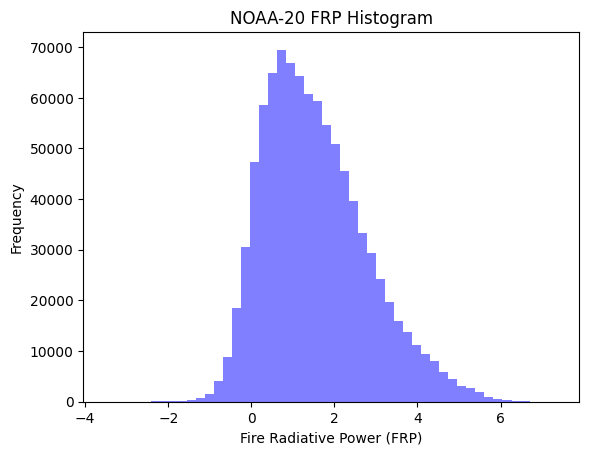

In [11]:
np.log(NOAA_20_data["frp"]).plot(kind="hist", bins=50, alpha=0.5, color="blue", label="NOAA-20",
                         xlabel="Fire Radiative Power (FRP)", ylabel="Frequency", title="NOAA-20 FRP Histogram")

In [12]:
theshold = 0
NOAA_20_data["frp"] = np.log(NOAA_20_data["frp"])
SNPP_data["frp"] = np.log(SNPP_data["frp"])
NOAA_20_data = NOAA_20_data[NOAA_20_data["frp"] > theshold]
SNPP_data = SNPP_data[SNPP_data["frp"] > theshold]

In [ ]:
# Convert acquisition date to datetime format
NOAA_20_data['acq_date'] = pd.to_datetime(NOAA_20_data['acq_date'])

# Step 2: Load the Canada provinces shapefile
# Note: Adjust the path and layer details based on your file.
provinces = gpd.read_file("data/province_Data/gpr_000b11a_e.shp")

# Inspect the provinces GeoDataFrame to see which column contains the province name.
print(provinces.columns)

# Step 3: Convert FIRMS data to a GeoDataFrame using the latitude and longitude columns
fire_gdf = gpd.GeoDataFrame(
    NOAA_20_data, 
    geometry=gpd.points_from_xy(NOAA_20_data.longitude, NOAA_20_data.latitude),
    crs="EPSG:4326"
)

# Step 4: Spatially join the fire points with the province boundaries
# This attaches the province information to each fire record based on location.
fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")

# Step 5: Group by province to get counts of fire detections per province
# Adjust 'NAME' to the appropriate column name in your provinces shapefile if different.
top_provinces = fire_with_province['PRNAME'].value_counts().head(3)
print("Top three provinces with most wildfires:")
print(top_provinces)

# Step 6: Extract the month name from the acquisition date for temporal analysis
NOAA_20_data['month'] = NOAA_20_data['acq_date'].dt.month_name()

# Count the number of fire events per month and get the top four months
top_months = NOAA_20_data['month'].value_counts().head(4)
print("Top four months with most wildfires:")
print(top_months)

# Optional: Plotting the fire locations for a visual check (e.g., using a simple plot)
fig, ax = plt.subplots(figsize=(10, 8))
provinces.plot(ax=ax, color='none', edgecolor='black')
fire_gdf.plot(ax=ax, markersize=1, color='red')
plt.title("Wildfire Detections in Canada")
plt.show()

Index(['PRUID', 'PRNAME', 'PRENAME', 'PRFNAME', 'PREABBR', 'PRFABBR',
       'geometry'],
      dtype='object')


/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_42908/3875276050.py:20: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")
